## Problem Statement

This dataset is from an ecommerce company and they want to analyze the customer purchase behavior specifically purchase amount against the customer’s gender and various other factors to make better business decisions. They want to understand if the spending habits differ between male and female customers.

Concepts Used : CLT, Confidence Interval

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv('ecommerce.csv')
df.head()
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
### There's no missing value. Age is already binned.
df.shape

(550068, 10)

In [ ]:
sample_size=df.shape[0] ## number of rows
sample_size


550068

## Gender Vs Purchase

In [ ]:
## Unique number of users in each gender
df.groupby('Gender')['User_ID'].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

In [ ]:
## Distribution of gender
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [ ]:
## Check different metrics on purchase by different genders
df.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


We can see increased number in terms of count,mean and variance too for Male buyers.

In [ ]:
print("Female Median=",df[df['Gender']=='F']['Purchase'].median())
print("Female Median=",df[df['Gender']=='M']['Purchase'].median())

Female Median= 7914.0
Female Median= 8098.0


<Axes: xlabel='Gender', ylabel='Purchase'>

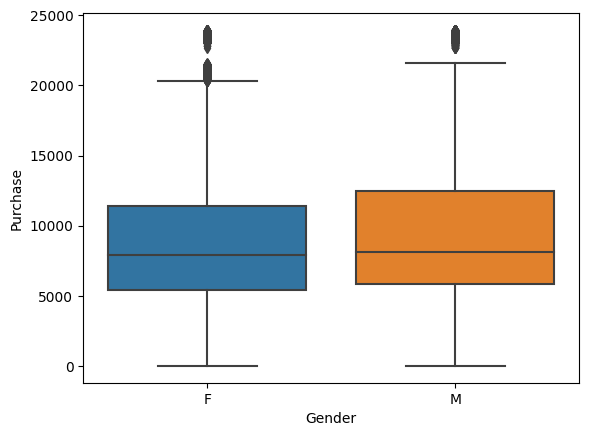

In [ ]:
sns.boxplot(x='Gender',y='Purchase',data=df)

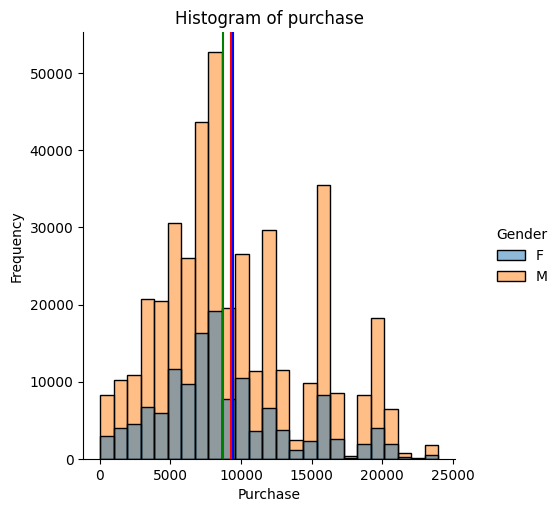

In [ ]:
## Plot observations
sns.displot(x='Purchase',data=df,bins=25,hue='Gender')
plt.xlabel('Purchase')
plt.ylabel('Frequency')
plt.title('Histogram of purchase')

plt.axvline(x=df['Purchase'].mean(),color='r')
plt.axvline(x=df[df['Gender']=='M']['Purchase'].mean(),color='b')
plt.axvline(x=df[df['Gender']=='F']['Purchase'].mean(),color='g')


From the above diagram, its clear that average purchase of Female is less than average purchase of users of all genders. Average purchase of males are more. Also distribution is normal.

In [ ]:
# Checking mean and standard deviation
df.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


Thinking of this dataset as population. Let's first check if applying CLT on it's sample gives us actual characterestics of the population or not.
Let us take a random sample (size = 300) from this data to analyse the sample mean.

In [ ]:
df.sample(300).groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,69.0,8273.260870,4547.902880,377.0,5863.0,7786.0,10038.0,20352.0
M,231.0,9316.904762,4998.155909,134.0,5631.5,8307.0,11996.5,21293.0


In [ ]:
df.sample(300).groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,88.0,8983.204545,4737.239429,745.0,5939.50,7933.0,11698.5,20843.0
M,212.0,8708.566038,4939.976998,60.0,5405.75,7806.0,11630.5,20949.0


Every time we take a sample, mean value is different. There is variability in the sample mean itself. Does the sample mean itself follow a distribution? Let’s assess this.
Let us pick around 1000 random samples of size 300 from the entire data set and calculated the mean of each sample.

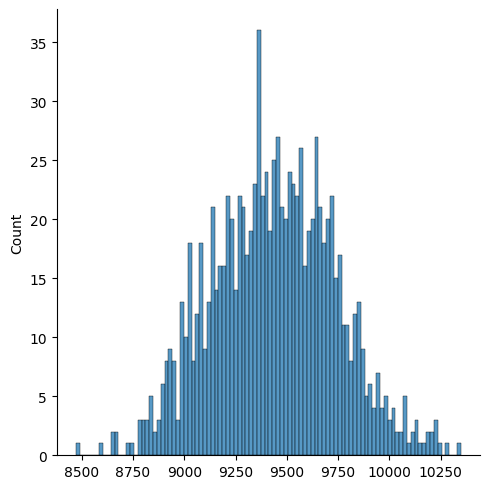

In [ ]:
male_sample_means_disbn=[]
for i in range(1000):
  s_mean=df[df['Gender']=='M']['Purchase'].sample(300).mean()
  male_sample_means_disbn.append(s_mean)
sns.displot(male_sample_means_disbn,bins=100)  ## This is sampling distribution

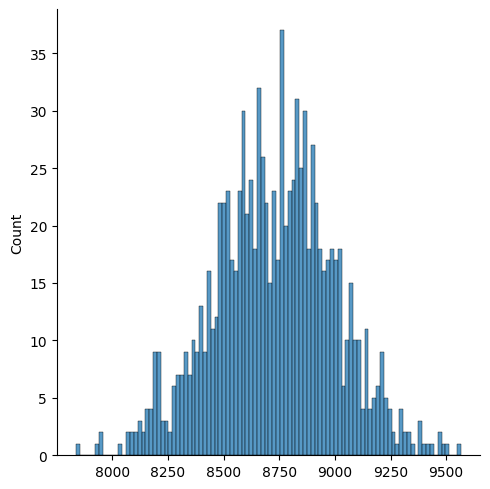

In [ ]:
female_sample_means_disbn=[]
for i in range(1000):
  s_mean=df[df['Gender']=='F']['Purchase'].sample(300).mean()
  female_sample_means_disbn.append(s_mean)
sns.displot(female_sample_means_disbn,bins=100)

We can observe that the sampling distribution is nearly normal. Now we will compute the mean and standard deviation of this sampling distribution.

In [ ]:
print("Mean of male sample means",pd.Series(male_sample_means_disbn).mean())
print("Mean of female sample means",pd.Series(female_sample_means_disbn).mean())

Mean of male sample means 9436.80771
Mean of female sample means 8728.33485


The mean of this sampling distribution (or in other words, the mean of all the sample means that we had taken), came out pretty close to the original population mean. This demonstrates the first property of the Central Limit theorem :
Sampling Distribution mean= Population Mean

However, it would not be fair to infer that the population mean is exactly equal to the sample mean. It is because the defects in the sampling process always tend to cause some errors.Therefore, the sample mean’s value must be reported with some margin of error.

In [ ]:
pd.Series(male_sample_means_disbn).std()

302.129799322567

In [ ]:
male_margin_error=pd.Series(male_sample_means_disbn).std()/np.sqrt(1000)
female_margin_error=pd.Series(female_sample_means_disbn).std()/np.sqrt(1000)
print(male_margin_error,female_margin_error)

9.554183148689093 8.574094883839155


Let us observe the effect of sample size on the resulting sampling distribution. In this demonstration, we will observe that as the sample size increases, the underlying sampling distribution will approximate a normal distribution.

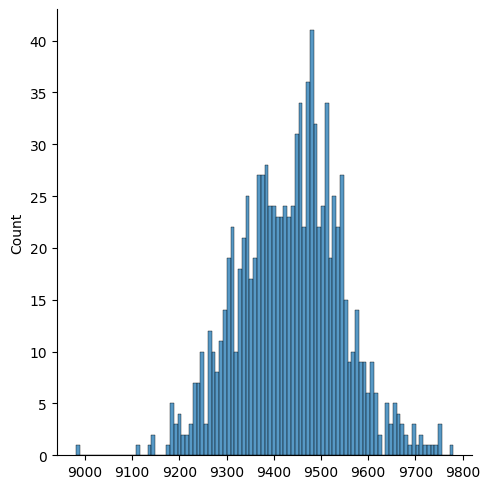

In [ ]:
male_sample_means_large=[]
for i in range(1000):
  s_mean=df[df['Gender']=='M']['Purchase'].sample(2000).mean()
  male_sample_means_large.append(s_mean)
sns.displot(male_sample_means_large,bins=100)

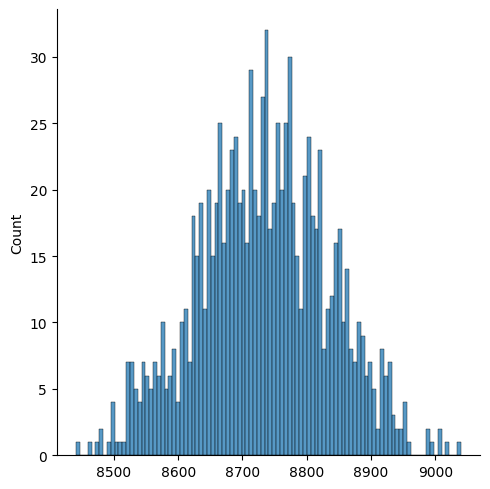

In [ ]:
female_sample_means_large=[]
for i in range(1000):
  s_mean=df[df['Gender']=='F']['Purchase'].sample(2000).mean()
  female_sample_means_large.append(s_mean)
sns.displot(female_sample_means_large,bins=100)

In [ ]:
print("Mean of purchase by male customers = ",df[df['Gender']=='M']['Purchase'].mean())
print("Mean of purchase by female customers = ",df[df['Gender']=='F']['Purchase'].mean())

Mean of purchase by male customers =  9437.526040472265
Mean of purchase by female customers =  8734.565765155476


90% Confidence Interval

In [ ]:
lower_limit=pd.Series(male_sample_means_disbn).mean()-(1.645*male_margin_error)
upper_limit=pd.Series(male_sample_means_disbn).mean()+(1.645*male_margin_error)
print("90% confidence interval for male sample mean distribution=",[lower_limit,upper_limit])

90% confidence interval for male sample mean distribution= [9421.091078720405, 9452.524341279594]


In [ ]:
lower_limit=pd.Series(female_sample_means_disbn).mean()-(1.645*female_margin_error)
upper_limit=pd.Series(female_sample_means_disbn).mean()+(1.645*female_margin_error)
print("90% confidence interval for female sample mean distribution=",[lower_limit,upper_limit])

90% confidence interval for female sample mean distribution= [8714.230463916085, 8742.439236083914]


95% Confidence Interval

In [ ]:
lower_limit=pd.Series(male_sample_means_disbn).mean()-(1.960*male_margin_error)
upper_limit=pd.Series(male_sample_means_disbn).mean()+(1.960*male_margin_error)
print("95% confidence interval for male sample mean distribution=",[lower_limit,upper_limit])

95% confidence interval for male sample mean distribution= [9418.08151102857, 9455.533908971429]


In [ ]:
lower_limit=pd.Series(female_sample_means_disbn).mean()-(1.960*female_margin_error)
upper_limit=pd.Series(female_sample_means_disbn).mean()+(1.960*female_margin_error)
print("95% confidence interval for female sample mean distribution=",[lower_limit,upper_limit])

95% confidence interval for female sample mean distribution= [8711.529624027675, 8745.140075972324]


99% Confidence Interval

In [ ]:
lower_limit=pd.Series(male_sample_means_disbn).mean()-(2.576*male_margin_error)
upper_limit=pd.Series(male_sample_means_disbn).mean()+(2.576*male_margin_error)
print("99% confidence interval for male sample mean distribution=",[lower_limit,upper_limit])

99% confidence interval for male sample mean distribution= [9412.196134208976, 9461.419285791022]


In [ ]:
lower_limit=pd.Series(female_sample_means_disbn).mean()-(2.576*female_margin_error)
upper_limit=pd.Series(female_sample_means_disbn).mean()+(2.576*female_margin_error)
print("99% confidence interval for female sample mean distribution=",[lower_limit,upper_limit])

99% confidence interval for female sample mean distribution= [8706.24798157923, 8750.421718420768]


Population mean of purchase by male and female customers fall within the range of all 3 confidence intervals.
Confidence interval of male and female buyers are not overlapping. Upper limit of female buyers are lower than lower limit of male buyers.

# **Marital Status Vs Purchase**

In [ ]:
df['Marital_Status'].value_counts()
## Data seems to be imbalanced in terms of 'Marital_Status' feature as the number of rows are different.

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [ ]:
df.groupby('Marital_Status')['User_ID'].nunique()

Marital_Status
0    3417
1    2474
Name: User_ID, dtype: int64

In [ ]:
df.groupby('Marital_Status')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


In [ ]:
print("Marital 0.0=",df[df['Marital_Status']==0.0]['Purchase'].median())
print("Marital 1.0=",df[df['Marital_Status']==1.0]['Purchase'].median())

Marital 0.0= 8044.0
Marital 1.0= 8051.0


<Axes: xlabel='Marital_Status', ylabel='Purchase'>

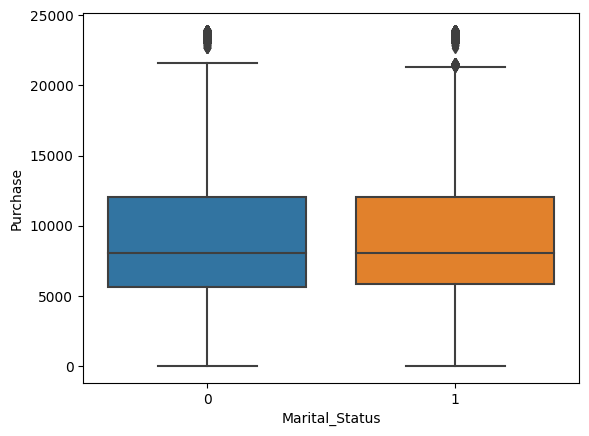

In [ ]:
sns.boxplot(x='Marital_Status',y='Purchase',data=df)

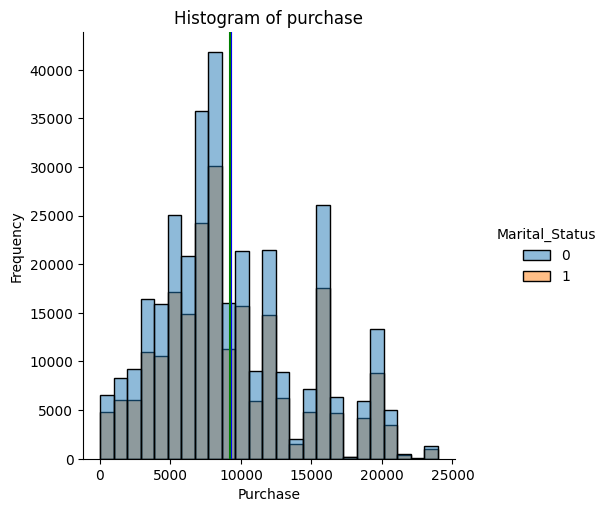

In [ ]:
## Plot observations
sns.displot(x='Purchase',data=df,bins=25,hue='Marital_Status')
plt.xlabel('Purchase')
plt.ylabel('Frequency')
plt.title('Histogram of purchase')

plt.axvline(x=df['Purchase'].mean(),color='r')
plt.axvline(x=df[df['Marital_Status']==0.0]['Purchase'].mean(),color='b')
plt.axvline(x=df[df['Marital_Status']==1.0]['Purchase'].mean(),color='g')


Looks like mean, variance,median of married and non married buyers are almost same. In the displot all averages are overlapped.

In [ ]:
df.groupby('Marital_Status')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


In [ ]:
df.sample(300).groupby('Marital_Status')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,180.0,9812.555556,5411.640815,362.0,6004.25,8682.0,14051.75,23114.0
1,120.0,9670.691667,5323.557665,939.0,5406.25,8334.0,15212.25,23960.0


Sample mean and population mean are close to each other.

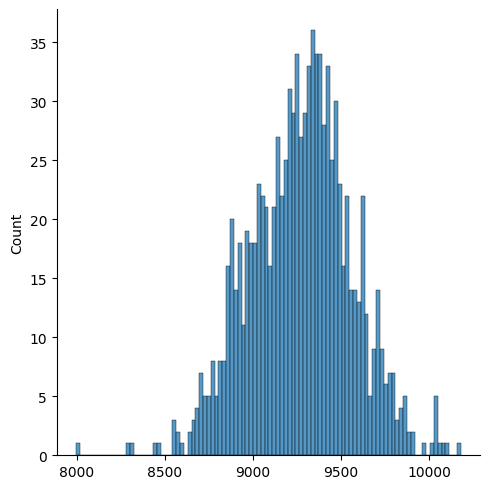

In [ ]:
notmarried_sample_means_disbn=[]
for i in range(1000):
  s_mean=df[df['Marital_Status']==0.0]['Purchase'].sample(300).mean()
  notmarried_sample_means_disbn.append(s_mean)
sns.displot(notmarried_sample_means_disbn,bins=100)

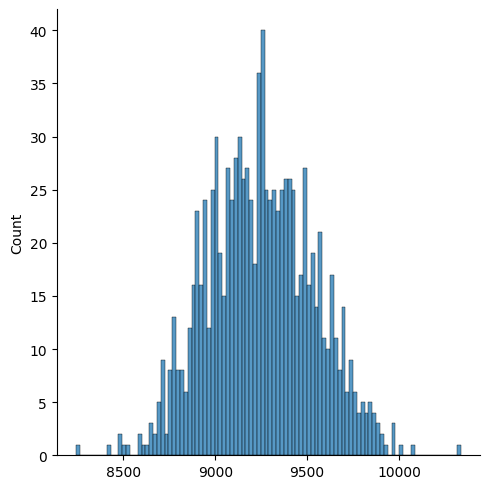

In [ ]:
married_sample_means_disbn=[]
for i in range(1000):
  s_mean=df[df['Marital_Status']==1.0]['Purchase'].sample(300).mean()
  married_sample_means_disbn.append(s_mean)
sns.displot(married_sample_means_disbn,bins=100)

Distribution plot for married and non married are close to normal.

In [ ]:
print("Mean of notmarried sample means",pd.Series(notmarried_sample_means_disbn).mean())
print("Mean of married sample means",pd.Series(married_sample_means_disbn).mean(),"\n")
print("Mean of population:\n\n",df.groupby('Marital_Status')['Purchase'].mean())


Mean of notmarried sample means 9271.488553333334
Mean of married sample means 9246.643823333334 

Mean of population:

 Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64


Population mean and sample mean for both categories are almost equal. Now we can find the confidence interval.

In [ ]:
notmarried_margin_error=pd.Series(notmarried_sample_means_disbn).std()/np.sqrt(1000)
married_margin_error=pd.Series(married_sample_means_disbn).std()/np.sqrt(1000)
print(notmarried_margin_error,married_margin_error)

9.149047091409708 9.06293781516367


In [ ]:
## 95% confidence interval
lower_limit=pd.Series(notmarried_sample_means_disbn).mean() - 1.960*notmarried_margin_error
upper_limit=pd.Series(notmarried_sample_means_disbn).mean() + 1.960*notmarried_margin_error
print("95% confidence interval=",[lower_limit,upper_limit])

95% confidence interval= [9253.55642103417, 9289.420685632498]


In [ ]:
lower_limit=pd.Series(married_sample_means_disbn).mean() - 1.960*married_margin_error
upper_limit=pd.Series(married_sample_means_disbn).mean() + 1.960*married_margin_error
print("95% confidence interval=",[lower_limit,upper_limit])

95% confidence interval= [9228.880465215612, 9264.407181451055]


Population mean of married and nonmarried falls under the range of 95% confidence interval for both categories. And confidence interval of 2 categories seems to be overlapping. So it is statistically insignificant to make any move targetting married/not married buyers.

## Age Vs Purchase

In [ ]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [ ]:
df.groupby('Age')['User_ID'].nunique()

Age
0-17      218
18-25    1069
26-35    2053
36-45    1167
46-50     531
51-55     481
55+       372
Name: User_ID, dtype: int64

In [ ]:
df.groupby('Age')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


<Axes: xlabel='Age', ylabel='Purchase'>

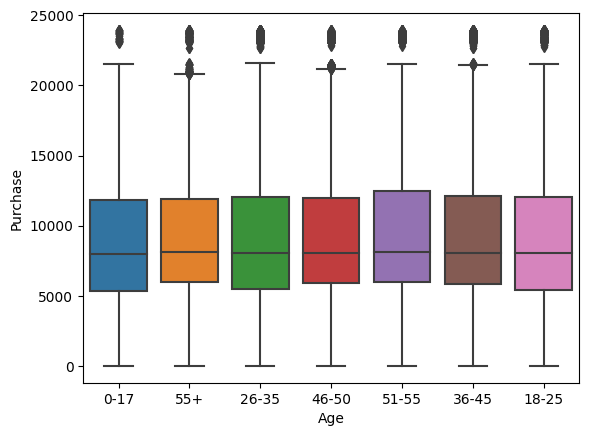

In [ ]:
sns.boxplot(x='Age',y='Purchase',data=df)

Mean, Median, Variance of population for different age groups seems to be almost equal.

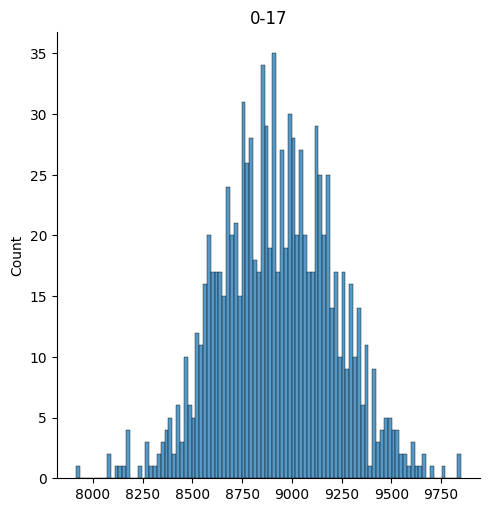

Mean of sample means of age  0-17  =  8927.295986666664
Population mean for age  0-17  =  8933.464640444974
Confidence interval of age group  0-17  =  [8909.452553531935, 8945.139419801393]


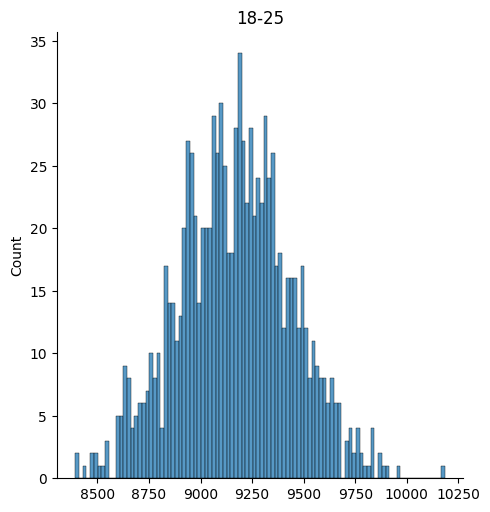

Mean of sample means of age  18-25  =  9167.942923333332
Population mean for age  18-25  =  9169.663606261289
Confidence interval of age group  18-25  =  [9150.945435625372, 9184.940411041292]


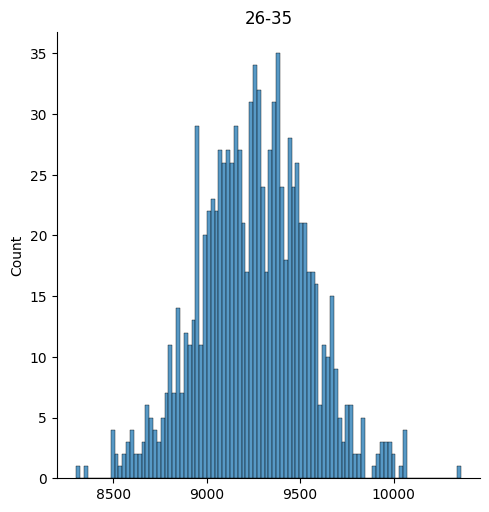

Mean of sample means of age  26-35  =  9250.335013333333
Population mean for age  26-35  =  9252.690632869888
Confidence interval of age group  26-35  =  [9232.413248365847, 9268.25677830082]


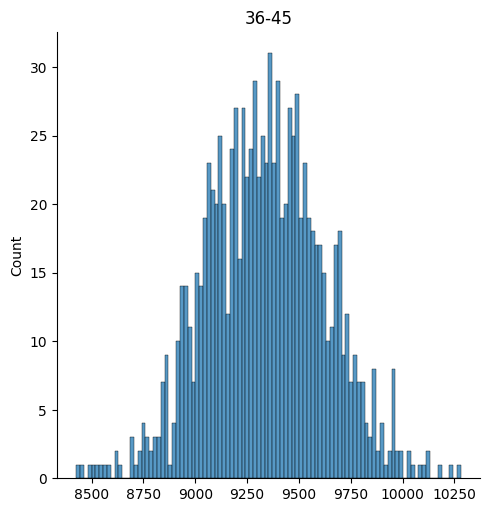

Mean of sample means of age  36-45  =  9339.577103333333
Population mean for age  36-45  =  9331.350694917874
Confidence interval of age group  36-45  =  [9321.786793279825, 9357.36741338684]


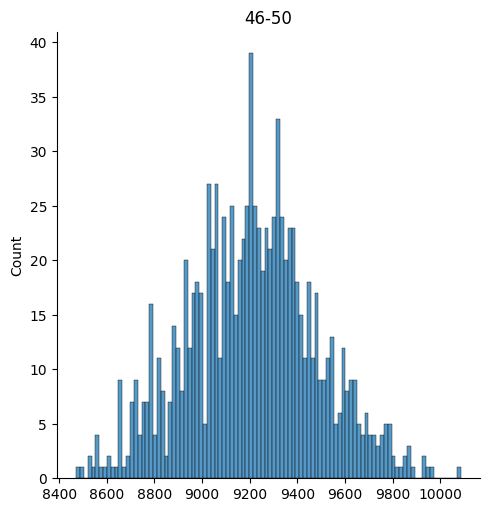

Mean of sample means of age  46-50  =  9210.121406666667
Population mean for age  46-50  =  9208.625697468327
Confidence interval of age group  46-50  =  [9193.271502670512, 9226.971310662822]


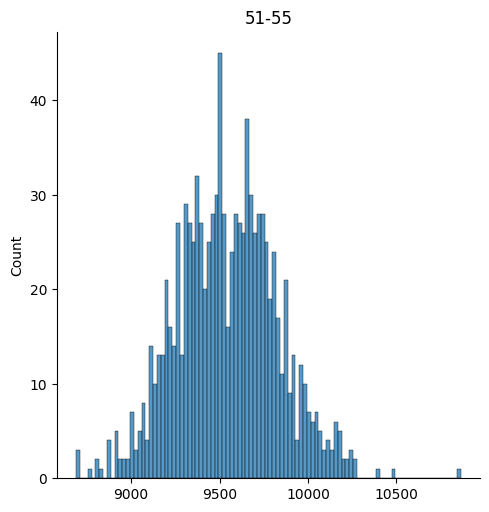

Mean of sample means of age  51-55  =  9544.590833333334
Population mean for age  51-55  =  9534.808030960236
Confidence interval of age group  51-55  =  [9526.921348899315, 9562.260317767352]


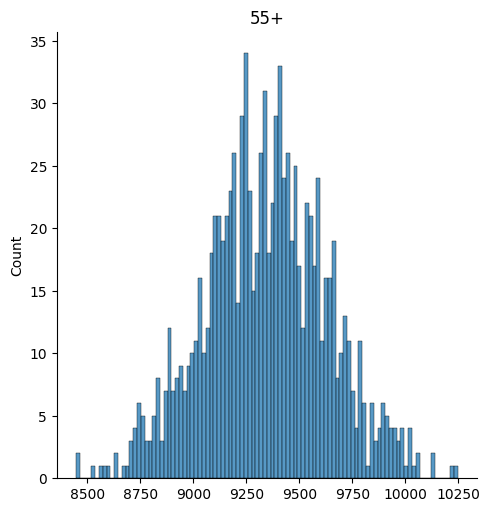

Mean of sample means of age  55+  =  9343.553886666667
Population mean for age  55+  =  9336.280459449405
Confidence interval of age group  55+  =  [9325.57250120268, 9361.535272130654]


In [ ]:
for age in '0-17','18-25','26-35','36-45','46-50','51-55','55+':
  sample_means_disbn=[]
  for i in range(1000):
    s_mean=df[df['Age']==age]['Purchase'].sample(300).mean()
    sample_means_disbn.append(s_mean)
  sns.displot(sample_means_disbn,bins=100)
  plt.title(age)
  plt.show()
  print("Mean of sample means of age ",age," = ",pd.Series(sample_means_disbn).mean())
  print("Population mean for age ",age," = ",df[df['Age']==age]['Purchase'].mean())
  margin_error=pd.Series(sample_means_disbn).std()/np.sqrt(1000)
  lower_limit=pd.Series(sample_means_disbn).mean()-1.960*margin_error
  upper_limit=pd.Series(sample_means_disbn).mean()+1.960*margin_error
  print("Confidence interval of age group ",age," = ",[lower_limit,upper_limit])

Population mean for all age groups fall exactly in 95% confidence interval of respective categories.
Age group 0-17 makes least purchases. Reason might be they don't have income. Most purchases are made by people of age group 51-55 .

# **Recommendations**

To attract more female buyers, introduce more discounts on female products, celebrate pink days, women's day etc.

Attract more kids by introducing products with lower prices as they dont have income.

Introduce offers on kids products.